In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

In [2]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'
npatches = 8
testing = True
test_dir = 'test_dir' if testing else ''

In [3]:
patch_dir = f'/scratch/aew492/research-summer2020_output/gradient/1D/patch_data/{cat_tag}/{npatches}patches/{test_dir}'

In [4]:
# this only applies to gradients in the x-direction
def get_fit_vals(cat_tag, L, rlz, m, b=0.5, testing=True):
    
    test_dir = 'test_dir' if testing else ''
    patch_dir = f'/scratch/aew492/research-summer2020_output/gradient/1D/patch_data/{cat_tag}/{npatches}patches/{test_dir}'
    patch_info = np.load(os.path.join(patch_dir, f'{cat_tag}_rlz{rlz}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
    
    r_avg = patch_info['r_avg']
    theta = patch_info['theta']
    
    grad_rec = theta[1:]/theta[0]
    
    grad_exp = np.array([m /(b*L), 0, 0])
    
    fit_vals = {
        "r_avg" : r_avg,
        'theta' : theta,
        'grad_rec' : grad_rec,
        'grad_exp' : grad_exp,
    }
    
    return fit_vals

In [5]:
def plot_lst_sq_fit(patch_info, mock_info, bin_cutoff=11, ylim=0.015):
    r_avg = patch_info["r_avg"]
    bestfit_vals = patch_info["bestfit_vals"]
    m_fit = patch_info["m_fit"]
    b_fit = patch_info["b_fit"]
    grad_expected = mock_info["grad_expected"]
    
    x_vals = bestfit_vals[0]
    x_rec_mean = np.mean(x_vals[:bin_cutoff])
    x_rec_med = np.median(x_vals[:bin_cutoff])
    # print different values
    print("expected value = {:.6f}".format(grad_expected[0]))
    print("mean bin value = {:.6f}".format(x_rec_mean))
    print("median bin value = {:.6f}".format(x_rec_med))
    
    fig, ax = plt.subplots()
    ## zero line
    #plt.axhline(color="black", alpha=0.5)
    # expected x value
    ax.axhline(grad_expected[0], color="red", alpha=0.5, label="expected")
    # recovered x value
    ax.axhline(x_rec_mean, color="darkgreen", alpha=0.5, label="mean bin value")
    ax.axhline(x_rec_med, color="darkblue", alpha=0.5, label="median bin value")
    # x value in each bin
    plt.plot(r_avg[:bin_cutoff], x_vals[:bin_cutoff], color="purple", marker=".", label="m_fit_x/b_fit in bins")
    #plt.plot(r_avg, bestfit_vals[1], color="blue", marker=".", alpha=0.4, label="y fit")
    #plt.plot(r_avg, bestfit_vals[2], color="green", marker=".", alpha=0.4, label="z fit")

    ax.set_ylim((-ylim, ylim))
    ax.set_xlabel(r"Separation $r$ ($h^{-1}\,$Mpc)")
    ax.set_ylabel(r"Gradient Value ($h\,$Mpc$^{-1}$)")
    plt.legend()

### recovered gradient values: L750 n1e-4, m=1

In [ ]:
nmocks = 401
m = 1
b = 0.5

#### individual amplitudes

In [16]:
thetas = np.empty((nmocks, 4))
for rlz in range(nmocks):
    fit_vals = get_fit_vals(cat_tag, 750, rlz, m=m, b=b)
    thetas[rlz] = fit_vals['theta'].flatten()

In [18]:
# standard deviations
stds_theta = np.std(thetas, axis=0)
stds_theta

array([0.06235869, 0.00041949, 0.00050483, 0.00050534])

^^ Standard deviations for $\theta = [ a_0, a_1, a_2, a_3 ]$ , 401 rlzs of L750, n1e-4, m=1, b=0.5

Compare to standard deviations recovered from CFE (for same mock parameters):

In [19]:
stds_cfe = np.array([0.05016015, 0.00034224, 0.00045429, 0.00047649])
stds_cfe

array([0.05016015, 0.00034224, 0.00045429, 0.00047649])

In [20]:
stds_theta - stds_cfe

array([1.21985376e-02, 7.72533930e-05, 5.05436518e-05, 2.88501822e-05])

#### combined amplitudes => gradient value

In [7]:
grads_rec = np.empty((nmocks,3))
grads_exp = np.empty((nmocks,3))
for rlz in range(nmocks):
    fit_vals = get_fit_vals(cat_tag, 750, rlz, m=m, b=b)
    grads_rec[rlz] = fit_vals['grad_rec'].flatten()
    grads_exp[rlz] = fit_vals['grad_exp']

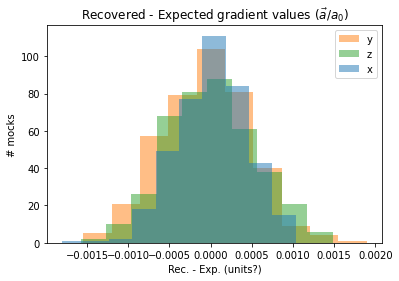

In [8]:
alpha = 0.5
plt.hist(grads_rec[:,1] - grads_exp[:,1], color='C1', alpha=alpha, label='y')
plt.hist(grads_rec[:,2] - grads_exp[:,2], color='C2', alpha=alpha, label='z')
plt.hist(grads_rec[:,0] - grads_exp[:,0], color='C0', alpha=alpha, label='x')

plt.title(r'Recovered - Expected gradient values ($\vec{a}/a_0$)')
plt.xlabel('Rec. - Exp. (units?)')
plt.ylabel('# mocks')
plt.legend()

In [9]:
stds = np.std(grads_rec, axis=0)
stds.shape

(3,)

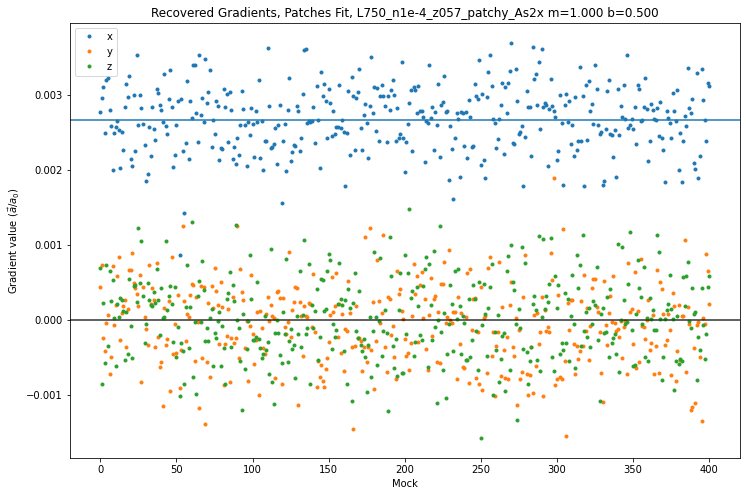

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

# x = np.linspace(0, nmocks, 2)
# ax.plot(x, x)
ax.plot(grads_rec[:,0], ls='None', marker='.', label='x')
plt.axhline(grads_exp[0,0])

ax.plot(grads_rec[:,1], ls='None', marker='.', label='y')
plt.axhline(grads_exp[0,1], alpha=0.5, color='k')

ax.plot(grads_rec[:,2], ls='None', marker='.', label='z')
plt.axhline(grads_exp[0,2], alpha=0.5, color='k')

ax.set_title(f'Recovered Gradients, Patches Fit, {cat_tag} m={m:.3f} b={b:.3f}')
ax.set_xlabel('Mock')
ax.set_ylabel(r'Gradient value ($\vec{a}/a_0$)')
plt.legend()

In [11]:
stds

array([0.0004265 , 0.00053195, 0.00053311])